# **Haroon Bacha**
# **7th Semester BSDS(B)**

In [1]:
pip install tensorflow numpy matplotlib pandas


# **Q#1**

# **Load Dataset**

In [3]:
import pandas as pd

url = "diabetes.csv"
df = pd.read_csv(url)

X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


# **Build a Simple Neural Network Model**

In [5]:
import tensorflow as tf

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


# **Train with Batch Gradient Descent**

In [6]:
model_bgd = build_model()
model_bgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='binary_crossentropy'
)

history_bgd = model_bgd.fit(
    X, y,
    epochs=50,
    batch_size=len(X),  # full dataset
    verbose=0
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Train with Stochastic Gradient Descent (SGD)**

In [7]:
model_sgd = build_model()
model_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='binary_crossentropy'
)

history_sgd = model_sgd.fit(
    X, y,
    epochs=50,
    batch_size=1,  # 1 sample
    verbose=0
)


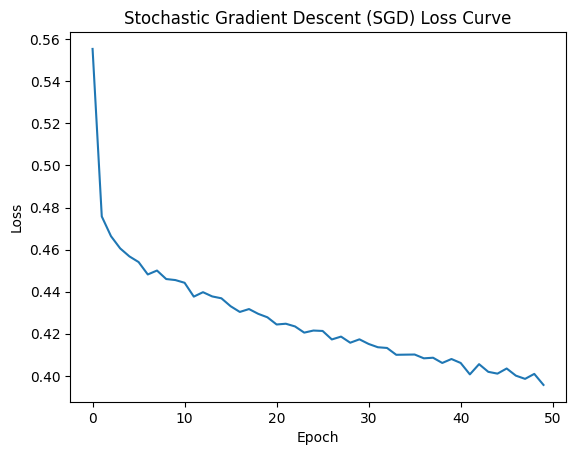

In [15]:
plt.plot(history_sgd.history['loss'])
plt.title("Stochastic Gradient Descent (SGD) Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# **Train with Mini-Batch Gradient Descent**

In [8]:
model_mb = build_model()
model_mb.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='binary_crossentropy'
)

history_mb = model_mb.fit(
    X, y,
    epochs=50,
    batch_size=32,  # typical mini-batch
    verbose=0
)


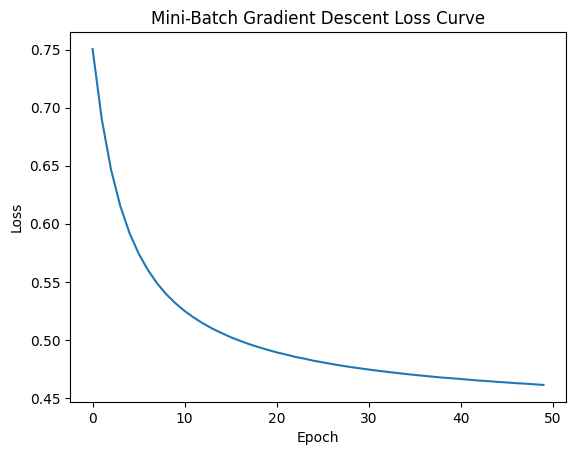

In [16]:
plt.plot(history_mb.history['loss'])
plt.title("Mini-Batch Gradient Descent Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# **Plot Loss Curves**

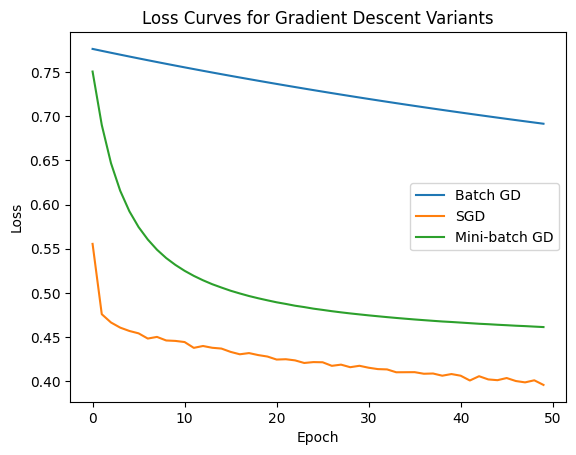

In [9]:
import matplotlib.pyplot as plt

plt.plot(history_bgd.history['loss'], label='Batch GD')
plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_mb.history['loss'], label='Mini-batch GD')
plt.title("Loss Curves for Gradient Descent Variants")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# **Q#2**

# **Create a Deep Network**

In [10]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='sigmoid', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

deep_model.compile(
    optimizer='sgd',
    loss='binary_crossentropy'
)

history_deep = deep_model.fit(
    X, y,
    epochs=100,
    batch_size=32,
    verbose=0
)


# **Plot Loss for Deep Model**

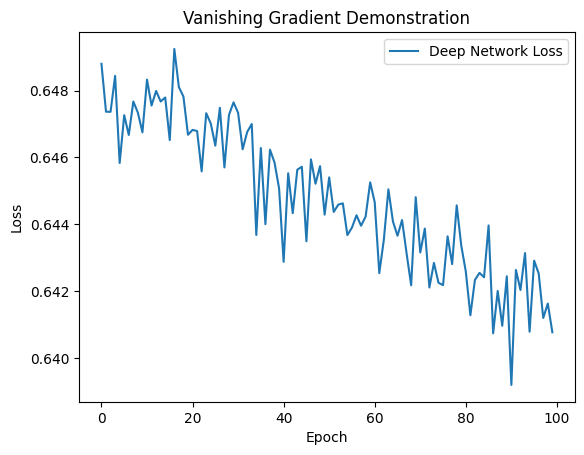

In [11]:
plt.plot(history_deep.history['loss'], label="Deep Network Loss")
plt.title("Vanishing Gradient Demonstration")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [14]:
import numpy as np
import tensorflow as tf

# Compute gradients on random batch to show magnitude
batch = X[:32]
with tf.GradientTape() as tape:
    preds = deep_model(batch)
    # Reshape y[:32] to match the shape of preds (32, 1)
    loss_value = tf.keras.losses.binary_crossentropy(tf.expand_dims(y[:32], axis=-1), preds)
grads = tape.gradient(loss_value, deep_model.trainable_variables)
norms = [np.linalg.norm(g.numpy()) for g in grads]

print("Gradient norms:", norms[:5])

Gradient norms: [np.float32(0.37679058), np.float32(0.21536693), np.float32(5.9627757), np.float32(0.7451833), np.float32(22.668642)]
